epoch 1, loss 0.000633
epoch 2, loss 0.000049
epoch 3, loss 0.000049
epoch 4, loss 0.000049
epoch 5, loss 0.000049
epoch 6, loss 0.000049
epoch 7, loss 0.000049
epoch 8, loss 0.000049
epoch 9, loss 0.000049
epoch 10, loss 0.000049
epoch 11, loss 0.000049
epoch 12, loss 0.000049
epoch 13, loss 0.000049
epoch 14, loss 0.000049
epoch 15, loss 0.000049
epoch 16, loss 0.000049
epoch 17, loss 0.000049
epoch 18, loss 0.000049
epoch 19, loss 0.000049
epoch 20, loss 0.000049
epoch 21, loss 0.000049
epoch 22, loss 0.000049
epoch 23, loss 0.000049
epoch 24, loss 0.000049
epoch 25, loss 0.000049
epoch 26, loss 0.000049
epoch 27, loss 0.000049
epoch 28, loss 0.000049
epoch 29, loss 0.000049
epoch 30, loss 0.000049
epoch 31, loss 0.000049
epoch 32, loss 0.000049
epoch 33, loss 0.000049
epoch 34, loss 0.000049
epoch 35, loss 0.000049
epoch 36, loss 0.000049
epoch 37, loss 0.000049
epoch 38, loss 0.000049
epoch 39, loss 0.000049
epoch 40, loss 0.000049
epoch 41, loss 0.000049
epoch 42, loss 0.000049
e

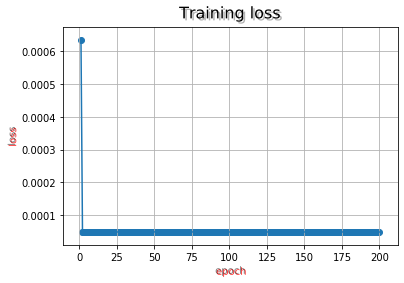

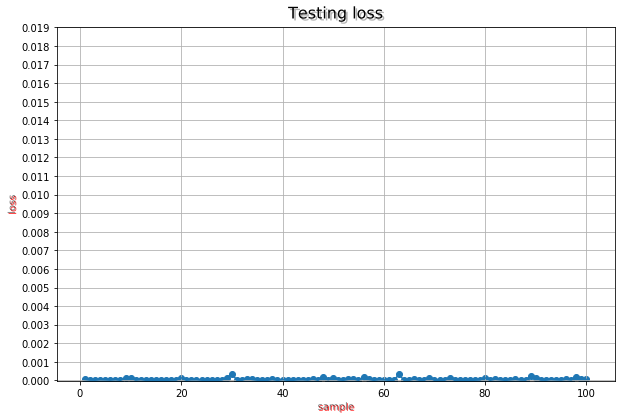

In [4]:
# coding = utf-8
# 拟合y = w * x + b

from IPython import display
from matplotlib import pyplot as plt
from matplotlib import patheffects
from mxnet import autograd, nd
import random
import numpy as np

# 矢量图显示
def use_svg_display():
    display.set_matplotlib_formats('svg')
# 设置图片尺寸
def set_figsize(figsize=(3.5, 3)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

# 返回batch_size个随机样本
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机读取样本，打乱索引顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i:min(i + batch_size, num_examples)])
        # take函数根据索引返回元素
        yield features.take(j), labels.take(j)

# 定义需要拟合的线性模型
def linreg(X, w, b):
    return w * X + b
def parabola(X, w, w1, b):
    return w * X * X + w1 * X + b

# 定义损失函数
def squared_loss(y_predict, y):
    return (y_predict - y.reshape(y_predict.shape)) ** 2 / 2

# 定义小批量随机梯度下降优化算法
def mini_batch_gd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

# 生成数据集：y = w * x + b + e，其中e表示随机噪声，服从均值为0标准差为0.01的正态分布
num_inputs = 1 # 特征数为1
num_example = 1000 # 训练数据集1000个样本
num_example_test = 100 # 测试数据集100个样本
# 模型中的真实参数
true_w = 2
true_b = 4.2

# 随机生成训练数据集
features = nd.random.normal(scale=1, shape=(num_example, num_inputs))
labels = true_w * features[:, 0] + true_b
labels += nd.random.normal(scale = 0.01, shape = labels.shape) # 添加随机噪声

# 随机生成测试数据集
features_test = nd.random.normal(scale=1, shape=(num_example_test, num_inputs))
labels_test = true_w * features_test[:, 0] + true_b
labels_test += nd.random.normal(scale = 0.01, shape = labels_test.shape) # 添加随机噪声

# 初始化参数并创建梯度
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
w.attach_grad()
w1 = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
w1.attach_grad()
b = nd.zeros(shape=(1,))
b.attach_grad()

# 训练模型
lr = 0.05
epochs = 200
batch_size = 10
net = linreg
loss = squared_loss
loss_draw = np.zeros(epochs, float)

for epoch in range(epochs):
    # 在每一次迭代中需要使用训练集的所有样本一次
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # l表示小批量的损失
        if len(y) < batch_size: # 最后一个批次的数据可能小于设定的batch_size
            l = l * batch_size / len(y)
        l.backward() # 小批量损失对模型参数求导
        mini_batch_gd([w, w1, b], lr, batch_size) # 调整参数
    train_l = loss(net(features, w, b), labels) # 当前迭代周期的平均误差
    loss_draw[epoch] = train_l.mean().asnumpy()
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

# 输出得到的模型参数
print(true_w, w)
print(true_b, b)

# 测试误差
test_l = loss(net(features_test, w, b), labels_test)

# 训练损失曲线
plt.figure(1)
epoch_draw = [i + 1 for i in range(epochs)]
plt.plot(epoch_draw, loss_draw)
plt.grid(True)
plt.scatter(epoch_draw, loss_draw)
# 曲线标题
title_text_obj = plt.title('Training loss', fontsize = 16, verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
# 曲线坐标轴
#括号里的第一组是偏移量，中间的表示颜色，最后面的是透明度，相当于定义了调色板模块
rgbRed = (1, 0, 0)
pe = patheffects.withSimplePatchShadow((1, -1), rgbRed, 0.8)
xlabel_obj = plt.xlabel('epoch', fontsize = 10, alpha = 0.5)
xlabel_obj.set_path_effects([pe])
ylabel_obj = plt.ylabel('loss', fontsize = 10, alpha = 0.5)
ylabel_obj.set_path_effects([pe])

# 测试误差曲线
plt.figure(figsize = (10, 6.5))
test_draw = [i + 1 for i in range(num_example_test)]
plt.plot(test_draw, test_l.asnumpy())
plt.grid(True)
plt.scatter(test_draw, test_l.asnumpy())
y1=np.arange(0,0.02,0.001)
plt.yticks(y1)
# 曲线标题
title_text_obj = plt.title('Testing loss', fontsize = 16, verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
# 曲线坐标轴
#括号里的第一组是偏移量，中间的表示颜色，最后面的是透明度，相当于定义了调色板模块
rgbRed = (1, 0, 0)
pe = patheffects.withSimplePatchShadow((1, -1), rgbRed, 0.8)
xlabel_obj = plt.xlabel('sample', fontsize = 10, alpha = 0.5)
xlabel_obj.set_path_effects([pe])
ylabel_obj = plt.ylabel('loss', fontsize = 10, alpha = 0.5)
ylabel_obj.set_path_effects([pe])

plt.show()


epoch 1, loss 0.015082
epoch 2, loss 0.000093
epoch 3, loss 0.000055
epoch 4, loss 0.000055
epoch 5, loss 0.000056
epoch 6, loss 0.000055
epoch 7, loss 0.000058
epoch 8, loss 0.000055
epoch 9, loss 0.000056
epoch 10, loss 0.000056
2 
[[-0.00069182]]
<NDArray 1x1 @cpu(0)>
4.2 
[4.2004757]
<NDArray 1 @cpu(0)>


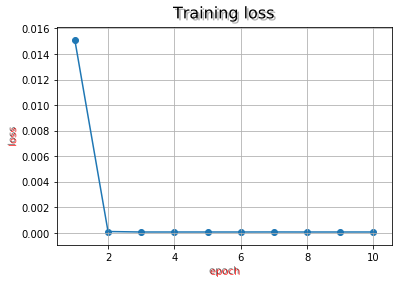

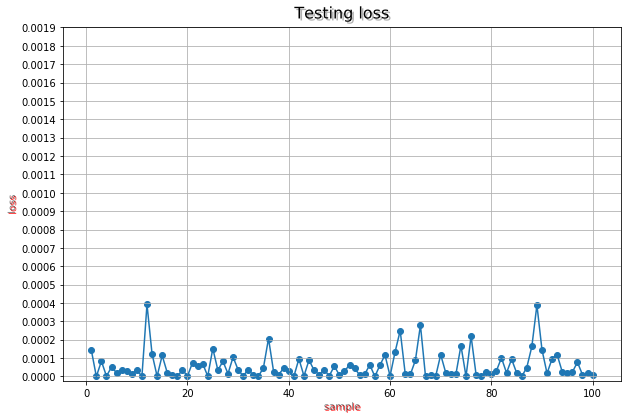

In [6]:
#overfitting过拟合情景
# coding = utf-8
# 拟合y = w * x + b

from IPython import display
from matplotlib import pyplot as plt
from matplotlib import patheffects
from mxnet import autograd, nd
import random
import numpy as np

# 矢量图显示
def use_svg_display():
    display.set_matplotlib_formats('svg')
# 设置图片尺寸
def set_figsize(figsize=(3.5, 3)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

# 返回batch_size个随机样本
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机读取样本，打乱索引顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i:min(i + batch_size, num_examples)])
        # take函数根据索引返回元素
        yield features.take(j), labels.take(j)

# 定义需要拟合的线性模型
def linreg(X, w, b):
    return w * X + b
def parabola(X, w, w1, b):
    return w * X * X + w1 * X + b

# 定义损失函数
def squared_loss(y_predict, y):
    return (y_predict - y.reshape(y_predict.shape)) ** 2 / 2

# 定义小批量随机梯度下降优化算法
def mini_batch_gd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

# 生成数据集：y = w * x + b + e，其中e表示随机噪声，服从均值为0标准差为0.01的正态分布
num_inputs = 1 # 特征数为1
num_example = 1000 # 训练数据集1000个样本
num_example_test = 100 # 测试数据集100个样本
# 模型中的真实参数
true_w = 2
true_b = 4.2

# 随机生成训练数据集
features = nd.random.normal(scale=1, shape=(num_example, num_inputs))
labels = true_w * features[:, 0] + true_b
labels += nd.random.normal(scale = 0.01, shape = labels.shape) # 添加随机噪声

# 随机生成测试数据集
features_test = nd.random.normal(scale=1, shape=(num_example_test, num_inputs))
labels_test = true_w * features_test[:, 0] + true_b
labels_test += nd.random.normal(scale = 0.01, shape = labels_test.shape) # 添加随机噪声

# 初始化参数并创建梯度
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
w.attach_grad()
w1 = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
w1.attach_grad()
b = nd.zeros(shape=(1,))
b.attach_grad()

# 训练模型
lr = 0.05
epochs = 10
batch_size = 10
net = parabola
loss = squared_loss
loss_draw = np.zeros(epochs, float)

for epoch in range(epochs):
    # 在每一次迭代中需要使用训练集的所有样本一次
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, w1, b), y) # l表示小批量的损失
        if len(y) < batch_size: # 最后一个批次的数据可能小于设定的batch_size
            l = l * batch_size / len(y)
        l.backward() # 小批量损失对模型参数求导
        mini_batch_gd([w, w1, b], lr, batch_size) # 调整参数
    train_l = loss(net(features, w, w1, b), labels) # 当前迭代周期的平均误差
    loss_draw[epoch] = train_l.mean().asnumpy()
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

# 输出得到的模型参数
print(true_w, w)
print(true_b, b)

# 测试误差
test_l = loss(net(features_test, w, w1, b), labels_test)

# 训练损失曲线
plt.figure(1)
epoch_draw = [i + 1 for i in range(epochs)]
plt.plot(epoch_draw, loss_draw)
plt.grid(True)
plt.scatter(epoch_draw, loss_draw)
# 曲线标题
title_text_obj = plt.title('Training loss', fontsize = 16, verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
# 曲线坐标轴
#括号里的第一组是偏移量，中间的表示颜色，最后面的是透明度，相当于定义了调色板模块
rgbRed = (1, 0, 0)
pe = patheffects.withSimplePatchShadow((1, -1), rgbRed, 0.8)
xlabel_obj = plt.xlabel('epoch', fontsize = 10, alpha = 0.5)
xlabel_obj.set_path_effects([pe])
ylabel_obj = plt.ylabel('loss', fontsize = 10, alpha = 0.5)
ylabel_obj.set_path_effects([pe])

# 测试误差曲线
plt.figure(figsize = (10, 6.5))
test_draw = [i + 1 for i in range(num_example_test)]
plt.plot(test_draw, test_l.asnumpy())
plt.grid(True)
plt.scatter(test_draw, test_l.asnumpy())
y1=np.arange(0,0.002,0.0001)
plt.yticks(y1)
# 曲线标题
title_text_obj = plt.title('Testing loss', fontsize = 16, verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
# 曲线坐标轴
#括号里的第一组是偏移量，中间的表示颜色，最后面的是透明度，相当于定义了调色板模块
rgbRed = (1, 0, 0)
pe = patheffects.withSimplePatchShadow((1, -1), rgbRed, 0.8)
xlabel_obj = plt.xlabel('sample', fontsize = 10, alpha = 0.5)
xlabel_obj.set_path_effects([pe])
ylabel_obj = plt.ylabel('loss', fontsize = 10, alpha = 0.5)
ylabel_obj.set_path_effects([pe])

plt.show()


epoch 1, loss 5.028810
epoch 2, loss 4.816528
epoch 3, loss 4.749299
epoch 4, loss 4.858381
epoch 5, loss 4.755714
epoch 6, loss 5.081656
epoch 7, loss 4.740069
epoch 8, loss 4.773970
epoch 9, loss 4.846242
epoch 10, loss 4.777768
2 
[[1.7028699]]
<NDArray 1x1 @cpu(0)>
4.2 
[6.151374]
<NDArray 1 @cpu(0)>


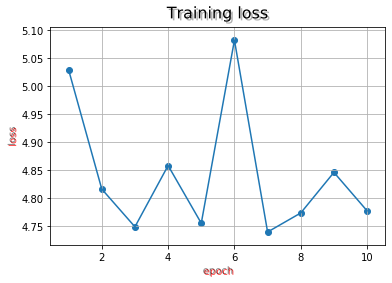

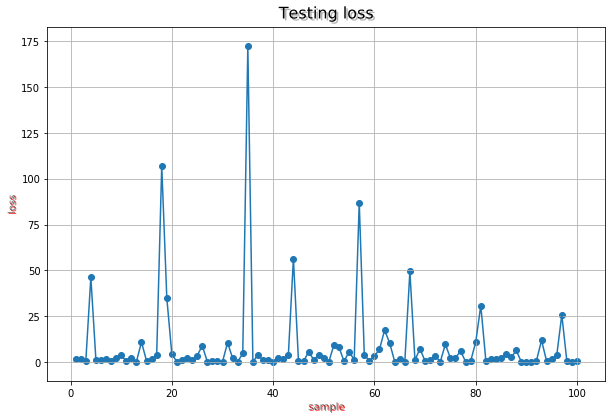

In [20]:
#underfitting欠拟合
# coding = utf-8
# 拟合y = w * x + b

from IPython import display
from matplotlib import pyplot as plt
from matplotlib import patheffects
from mxnet import autograd, nd
import random
import numpy as np

# 矢量图显示
def use_svg_display():
    display.set_matplotlib_formats('svg')
# 设置图片尺寸
def set_figsize(figsize=(3.5, 3)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

# 返回batch_size个随机样本
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机读取样本，打乱索引顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i:min(i + batch_size, num_examples)])
        # take函数根据索引返回元素
        yield features.take(j), labels.take(j)

# 定义需要拟合的线性模型
def linreg(X, w, b):
    return w * X + b
def parabola(X, w, w1, b):
    return w * X * X + w1 * X + b

# 定义损失函数
def squared_loss(y_predict, y):
    return (y_predict - y.reshape(y_predict.shape)) ** 2 / 2

# 定义小批量随机梯度下降优化算法
def mini_batch_gd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

# 生成数据集：y = w * x + b + e，其中e表示随机噪声，服从均值为0标准差为0.01的正态分布
num_inputs = 1 # 特征数为1
num_example = 1000 # 训练数据集1000个样本
num_example_test = 100 # 测试数据集100个样本
# 模型中的真实参数
true_w = 2
true_w1 = 1.5
true_b = 4.2

# 随机生成训练数据集
features = nd.random.normal(scale=1, shape=(num_example, num_inputs))
labels = true_w * features[:, 0] * features[:, 0] + true_w1 * features[:, 0] + true_b
labels += nd.random.normal(scale = 0.01, shape = labels.shape) # 添加随机噪声

# 随机生成测试数据集
features_test = nd.random.normal(scale=1, shape=(num_example_test, num_inputs))
labels_test = true_w * features[:, 0] * features[:, 0] + true_w1 * features[:, 0] + true_b
labels_test += nd.random.normal(scale = 0.01, shape = labels_test.shape) # 添加随机噪声

# 初始化参数并创建梯度
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
w.attach_grad()
b = nd.zeros(shape=(1,))
b.attach_grad()

# 训练模型
lr = 0.05
epochs = 10
batch_size = 10
net = linreg
loss = squared_loss
loss_draw = np.zeros(epochs, float)

for epoch in range(epochs):
    # 在每一次迭代中需要使用训练集的所有样本一次
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # l表示小批量的损失
        if len(y) < batch_size: # 最后一个批次的数据可能小于设定的batch_size
            l = l * batch_size / len(y)
        l.backward() # 小批量损失对模型参数求导
        mini_batch_gd([w, b], lr, batch_size) # 调整参数
    train_l = loss(net(features, w, b), labels) # 当前迭代周期的平均误差
    loss_draw[epoch] = train_l.mean().asnumpy()
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

# 输出得到的模型参数
print(true_w, w)
print(true_b, b)

# 测试误差
test_l = loss(net(features_test, w, b), labels_test)

# 训练损失曲线
plt.figure(1)
epoch_draw = [i + 1 for i in range(epochs)]
plt.plot(epoch_draw, loss_draw)
plt.grid(True)
plt.scatter(epoch_draw, loss_draw)
# 曲线标题
title_text_obj = plt.title('Training loss', fontsize = 16, verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
# 曲线坐标轴
#括号里的第一组是偏移量，中间的表示颜色，最后面的是透明度，相当于定义了调色板模块
rgbRed = (1, 0, 0)
pe = patheffects.withSimplePatchShadow((1, -1), rgbRed, 0.8)
xlabel_obj = plt.xlabel('epoch', fontsize = 10, alpha = 0.5)
xlabel_obj.set_path_effects([pe])
ylabel_obj = plt.ylabel('loss', fontsize = 10, alpha = 0.5)
ylabel_obj.set_path_effects([pe])

# 测试误差曲线
plt.figure(figsize = (10, 6.5))
test_draw = [i + 1 for i in range(num_example_test)]
plt.plot(test_draw, test_l.asnumpy())
plt.grid(True)
plt.scatter(test_draw, test_l.asnumpy())
# 曲线标题
title_text_obj = plt.title('Testing loss', fontsize = 16, verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
# 曲线坐标轴
#括号里的第一组是偏移量，中间的表示颜色，最后面的是透明度，相当于定义了调色板模块
rgbRed = (1, 0, 0)
pe = patheffects.withSimplePatchShadow((1, -1), rgbRed, 0.8)
xlabel_obj = plt.xlabel('sample', fontsize = 10, alpha = 0.5)
xlabel_obj.set_path_effects([pe])
ylabel_obj = plt.ylabel('loss', fontsize = 10, alpha = 0.5)
ylabel_obj.set_path_effects([pe])

plt.show()
